Сссылка на репозиторий: https://www.kaggle.com/datasets/pratyushakar/rossmann-store-sales/data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## План проекта

#### **Проект: Аналитика продаж и эффективности акций с визуализацией**

---

#### **1. Цель проекта**
Создать аналитическую платформу, которая поможет:
- Понять основные факторы, влияющие на объем продаж в магазинах.
- Оценить эффективность промо-акций.
- Визуализировать результаты в интерактивном дашборде для дальнейшего использования в принятии решений.

---

#### **2. Легенда**
Компания Rossmann управляет сетью розничных магазинов. Перед аналитиками стоит задача улучшить понимание продаж, выявить ключевые драйверы и оптимизировать промо-акции. Данные содержат информацию о продажах магазинов, акциях, конкурентах и других внешних факторах. Руководству важно получать аналитические отчеты в виде дашборда для отслеживания ключевых метрик и эффективности акций.

---

#### **3. Задачи**
1. **Факторный анализ продаж**:
   - Определить, какие переменные (например, акции, конкуренты, праздники, погода) влияют на объем продаж.
   - Выявить корреляции между факторами и продажами.
2. **Оценка эффективности акций**:
   - Проанализировать, как различные промо-акции влияют на объем продаж.
   - Выявить неэффективные или избыточные акции.
   - Оценить, как акции влияют на динамику после их завершения (например, снижение продаж).
3. **Визуализация и дашборд**:
   - Создать интерактивный дашборд для визуализации результатов.
   - Отобразить ключевые метрики с возможностью фильтрации по магазинам, времени и типу акций.

---

#### **4. План реализации**

##### **Этап 1: Предварительный анализ данных**
- Загрузить данные и изучить их структуру.
- Выполнить разведочный анализ данных (EDA):
  - Выявить пропуски и выбросы.
  - Изучить распределение продаж, акций и других факторов.
- Привести данные в удобный для анализа вид (например, преобразовать даты, закодировать категориальные признаки).

##### **Этап 2: Факторный анализ**
- Построить heatmap корреляций для численных признаков.
- Провести анализ влияния категориальных переменных (например, день недели, праздник, наличие акции).
- Использовать регрессионные модели для оценки важности факторов (например, Linear Regression, Random Forest).

##### **Этап 3: Анализ эффективности акций**
- Сравнить продажи в дни с акциями и без акций.
- Исследовать влияние акций на продажи в период после их завершения (например, временное снижение интереса покупателей).
- Построить временные ряды для анализа динамики продаж: до, в периоды акций и после них.

##### **Этап 4: Создание дашборда**
- Разработать интерактивный дашборд:
  - Графики трендов продаж.
  - Визуализация корреляций и факторов.
  - Метрики эффективности акций.
  - Фильтры по магазину, региону, времени и другим параметрам.

##### **Этап 5: Интерпретация и выводы**
- Сформулировать ключевые инсайты по результатам анализа.
- Дать рекомендации для оптимизации акций и стратегии продаж.

---

#### **5. Технические детали**
- **Инструменты**: Python, SQL, Jupyter Notebook, сервис для дашборда.
- **Метрики**:
  - Рост продаж во время акций (%).
  - Динамика продаж после акций.
  - Вклад внешних факторов(расположение конкурента, выходные, праздники).

---

#### **6. Конечный результат**
- Интерактивный дашборд с аналитикой продаж и акций.
- Отчет с рекомендациями по оптимизации акций и повышению продаж.

##Подгрузка данных

In [ ]:
store_path = "/content/drive/MyDrive/Colab Notebooks/Менторство/Датасет проекта/store.csv"
test_path = "/content/drive/MyDrive/Colab Notebooks/Менторство/Датасет проекта/test.csv"
train_path = "/content/drive/MyDrive/Colab Notebooks/Менторство/Датасет проекта/train.csv"

store_data = pd.read_csv(store_path)
test_data = pd.read_csv(test_path, dtype={'StateHoliday': 'str'})
train_data = pd.read_csv(train_path, dtype={'StateHoliday': 'str'})

##Анализ полей

### Типы полей

#### Поля из `store.csv`

1. **Store**:
   - Тип: Целое число (`int`).
   - Описание: Уникальный идентификатор каждого магазина.

2. **StoreType**:
   - Тип: Категориальный (`category`).
   - Описание: Тип магазина, имеет значения `a`, `b`, `c`, `d`.

3. **Assortment**:
   - Тип: Категориальный (`category`).
   - Описание: Уровень ассортимента магазина (`a` = базовый, `b` = дополнительный, `c` = расширенный).

4. **CompetitionDistance**:
   - Тип: Вещественное число (`float`).
   - Описание: Расстояние до ближайшего конкурента в метрах. Может содержать пропуски.

5. **CompetitionOpenSinceMonth**:
   - Тип: Целое число (`int`).
   - Описание: Месяц, когда открылся ближайший конкурент. Может содержать пропуски.

6. **CompetitionOpenSinceYear**:
   - Тип: Целое число (`int`).
   - Описание: Год открытия ближайшего конкурента. Может содержать пропуски.

7. **Promo2**:
   - Тип: Двоичный (`int`).
   - Описание: Участвует ли магазин в акции Promo2 (`0` = нет, `1` = да).

8. **Promo2SinceWeek**:
   - Тип: Целое число (`int`).
   - Описание: Неделя года, когда магазин начал участвовать в Promo2. Может содержать пропуски.

9. **Promo2SinceYear**:
   - Тип: Целое число (`int`).
   - Описание: Год начала участия в Promo2. Может содержать пропуски.

10. **PromoInterval**:
    - Тип: Строка (`object`).
    - Описание: Месяцы, в которые Promo2 активна (например, `"Feb,May,Aug,Nov"`). Может содержать пропуски.

---

#### Поля из `train.csv`

1. **Store**:
   - Тип: Целое число (`int`).
   - Описание: Уникальный идентификатор магазина.

2. **DayOfWeek**:
   - Тип: Целое число (`int`).
   - Описание: День недели (`1` = понедельник, `7` = воскресенье).

3. **Date**:
   - Тип: Дата (`datetime`).
   - Описание: Дата записи.

4. **Sales**:
   - Тип: Вещественное число (`float`).
   - Описание: Продажи в этот день (целевая переменная). Может быть `0`, если магазин был закрыт.

5. **Customers**:
   - Тип: Целое число (`int`).
   - Описание: Количество клиентов за день.

6. **Open**:
   - Тип: Двоичный (`int`).
   - Описание: Был ли магазин открыт (`0` = нет, `1` = да). Может содержать пропуски.

7. **Promo**:
   - Тип: Двоичный (`int`).
   - Описание: Участвовал ли магазин в акции в этот день (`0` = нет, `1` = да).

8. **StateHoliday**:
   - Тип: Категориальный (`category`).
   - Описание: Тип праздничного дня (`a` = государственный, `b` = Пасха, `c` = Рождество, `0` = нет).

9. **SchoolHoliday**:
   - Тип: Двоичный (`int`).
   - Описание: Был ли этот день школьным праздником (`0` = нет, `1` = да).

---

#### Поля из `test.csv`

1. **Id**:
   - Тип: Целое число (`int`).
   - Описание: Уникальный идентификатор записи (пара `Store` + `Date`).

2. **Store**:
   - Тип: Целое число (`int`).
   - Описание: Уникальный идентификатор магазина.

3. **DayOfWeek**:
   - Тип: Целое число (`int`).
   - Описание: День недели (`1` = понедельник, `7` = воскресенье).

4. **Date**:
   - Тип: Дата (`datetime`).
   - Описание: Дата записи.

5. **Open**:
   - Тип: Двоичный (`int`).
   - Описание: Был ли магазин открыт (`0` = нет, `1` = да). Может содержать пропуски.

6. **Promo**:
   - Тип: Двоичный (`int`).
   - Описание: Участвовал ли магазин в акции в этот день (`0` = нет, `1` = да).

7. **StateHoliday**:
   - Тип: Категориальный (`category`).
   - Описание: Тип праздничного дня (`a`, `b`, `c`, `0`).

8. **SchoolHoliday**:
   - Тип: Двоичный (`int`).
   - Описание: Был ли этот день школьным праздником (`0` = нет, `1` = да).



###Проверка на пропуски

In [ ]:
def check_missing_values(data, dataset_name):
    missing_values = data.isnull().sum()
    total_missing = missing_values[missing_values > 0]

    if not total_missing.empty:
        print(f"\nMissing values in {dataset_name}:")
        print(pd.DataFrame({
            "Missing Count": total_missing,
            "Missing Percentage": ((total_missing / len(data)) * 100).round(2)
        }))
    else:
        print(f"\nNo missing values in {dataset_name}.")

#### Store

In [ ]:
print("Checking missing values in 'store_data'")
check_missing_values(store_data, "Store Data")

Checking missing values in 'store_data'

No missing values in Store Data.


####Train

In [ ]:
print("Checking missing values in 'train_data'")
check_missing_values(train_data, "Train Data")

Checking missing values in 'train_data'

No missing values in Train Data.


####Test

In [ ]:
print("Checking missing values in 'test_data'")
check_missing_values(test_data, "Test Data")

Checking missing values in 'test_data'

No missing values in Test Data.


###Барчарты

In [ ]:
def plot_distributions(data, dataset_name):
    for column in data.columns:
        plt.figure(figsize=(10, 6))
        if data[column].dtype in ['float64', 'int64']:
            sns.histplot(data[column].dropna(), kde=True, bins=30)
            plt.title(f'Distribution of {column} in {dataset_name}', fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.ylabel('Frequency', fontsize=12)
        else:
            sns.countplot(x=data[column], order=data[column].value_counts().index)
            plt.title(f'Countplot of {column} in {dataset_name}', fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.ylabel('Count', fontsize=12)
            plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


####Store

Plotting distributions for 'store_data'


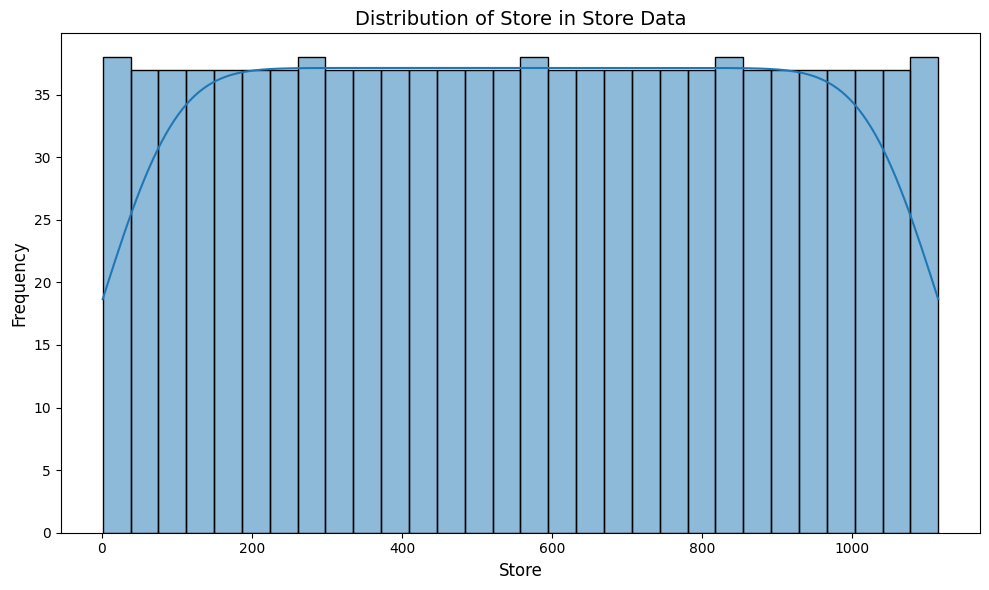

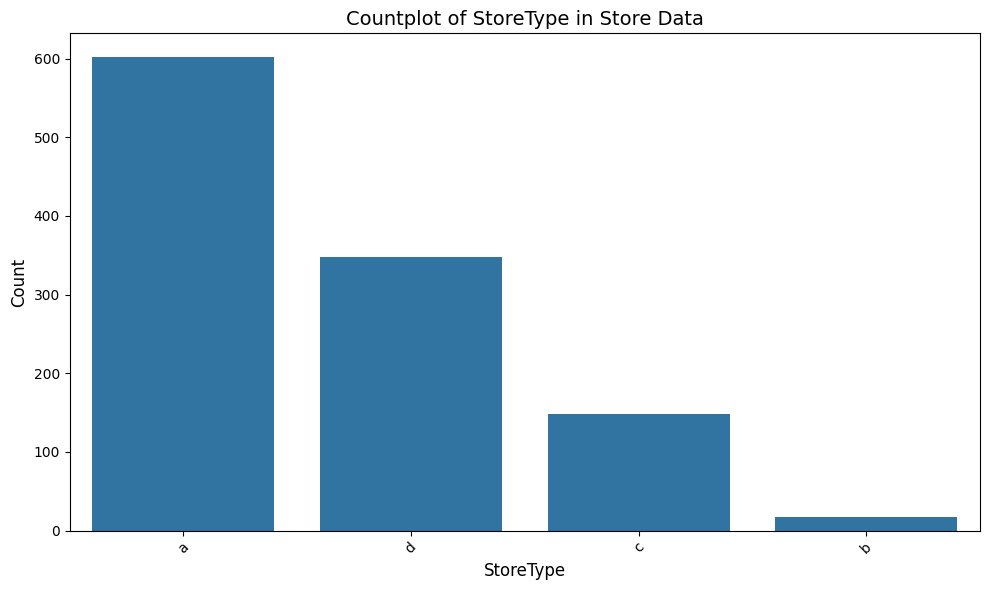

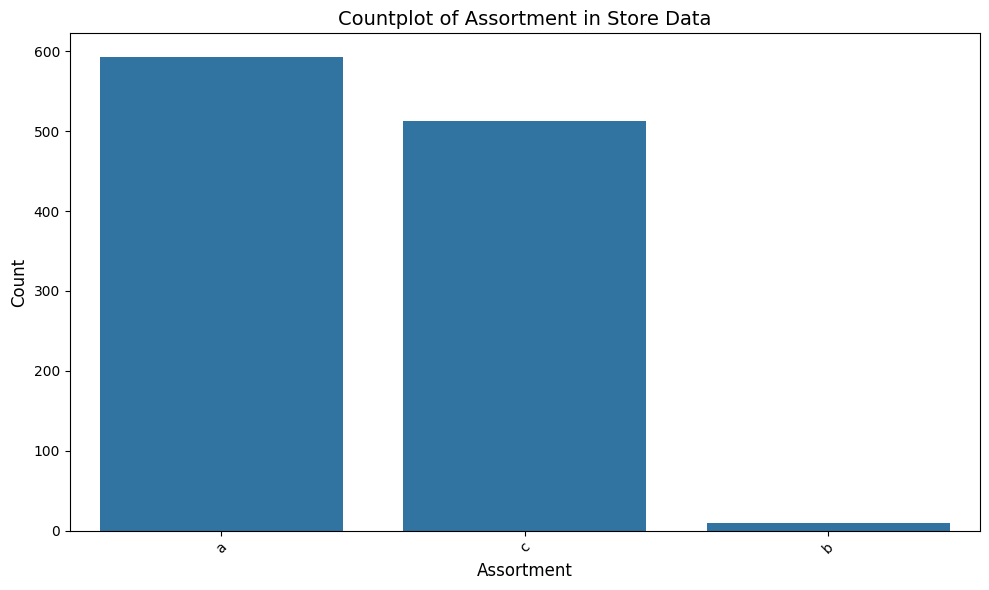

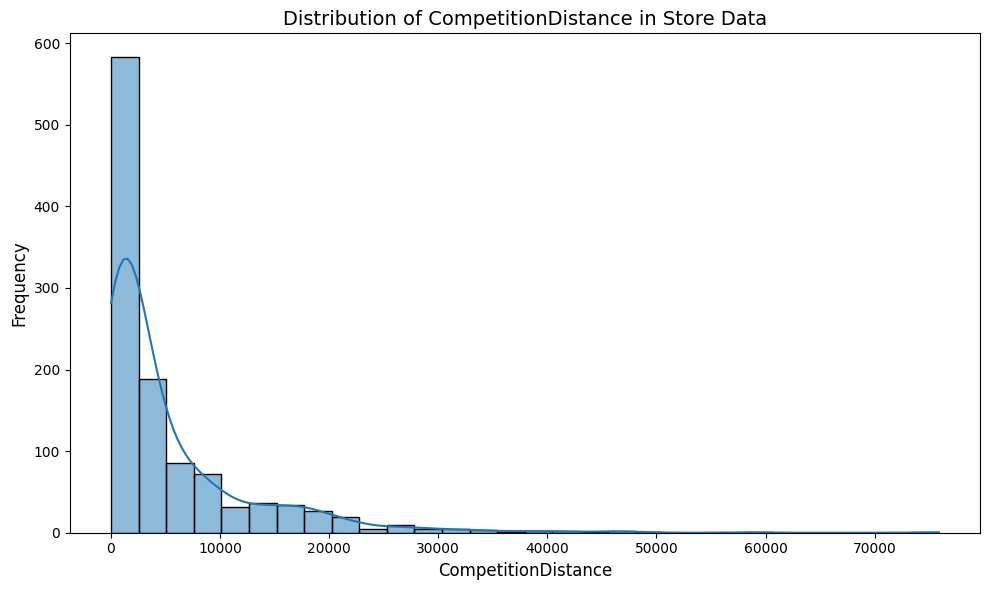

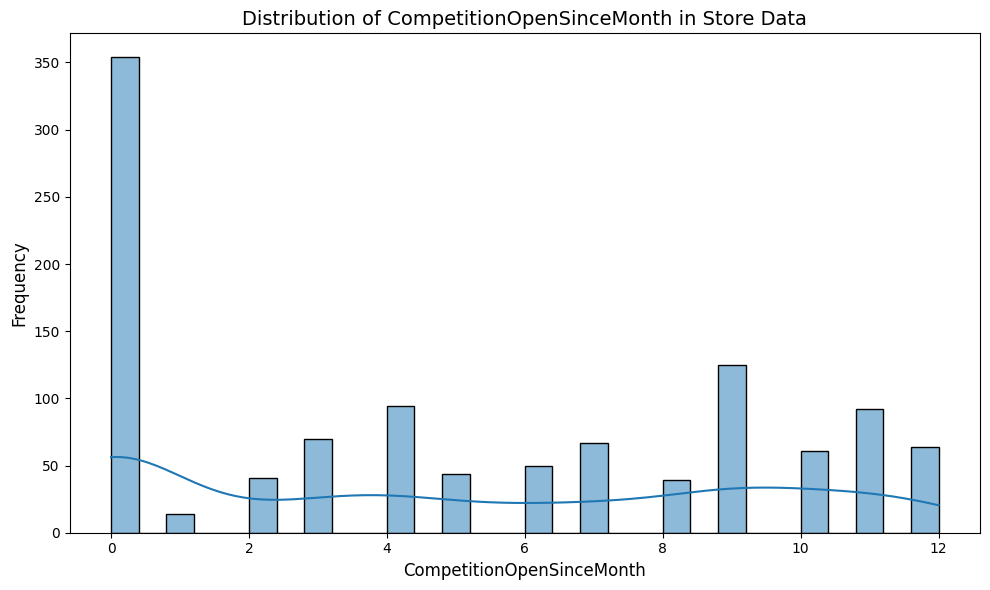

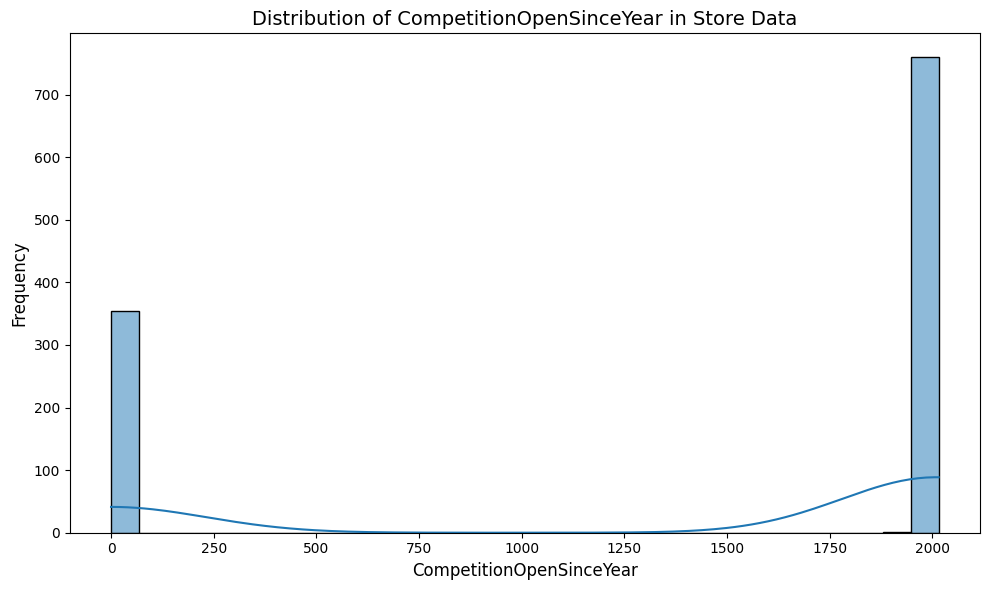

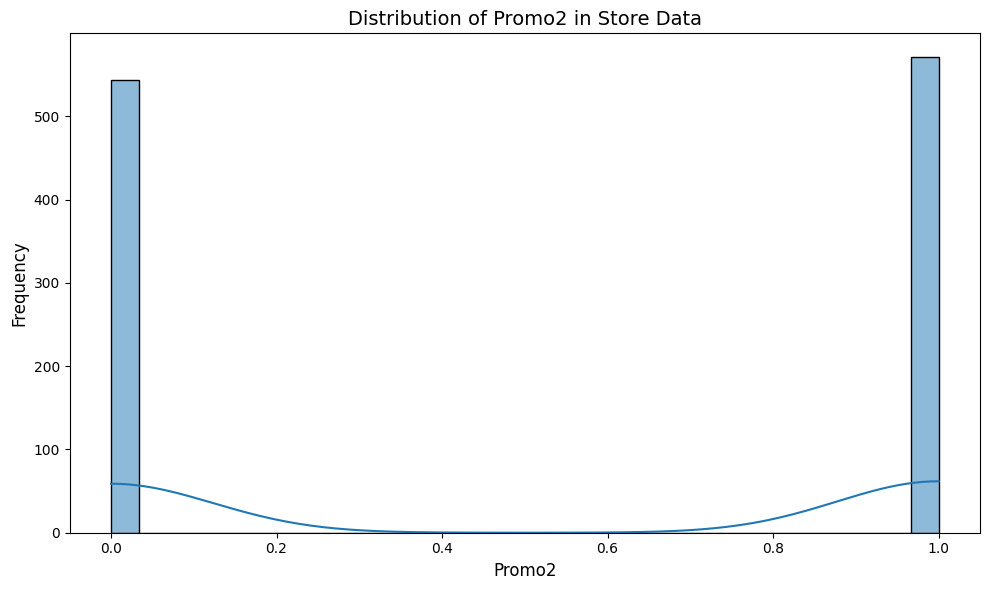

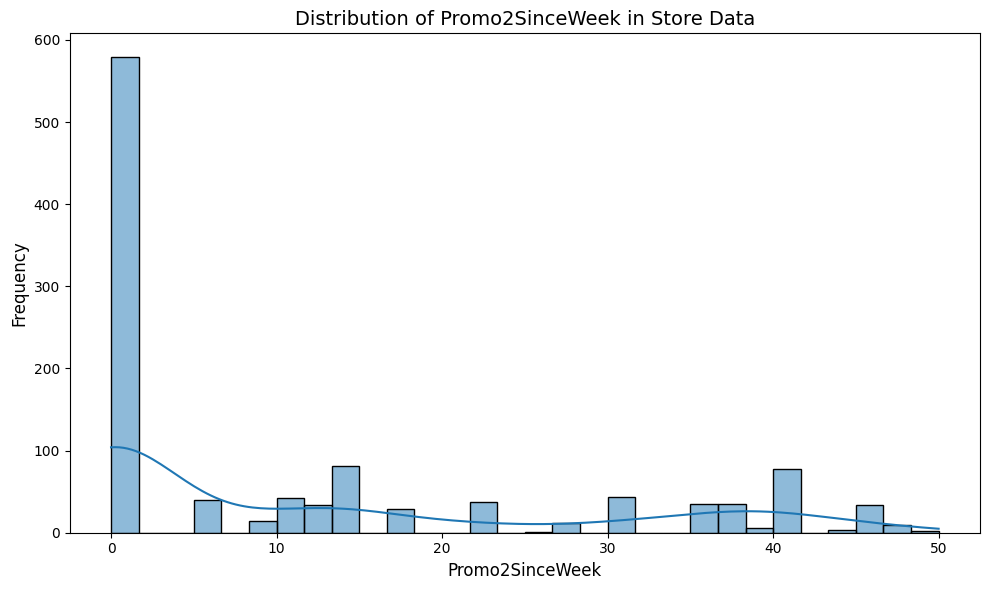

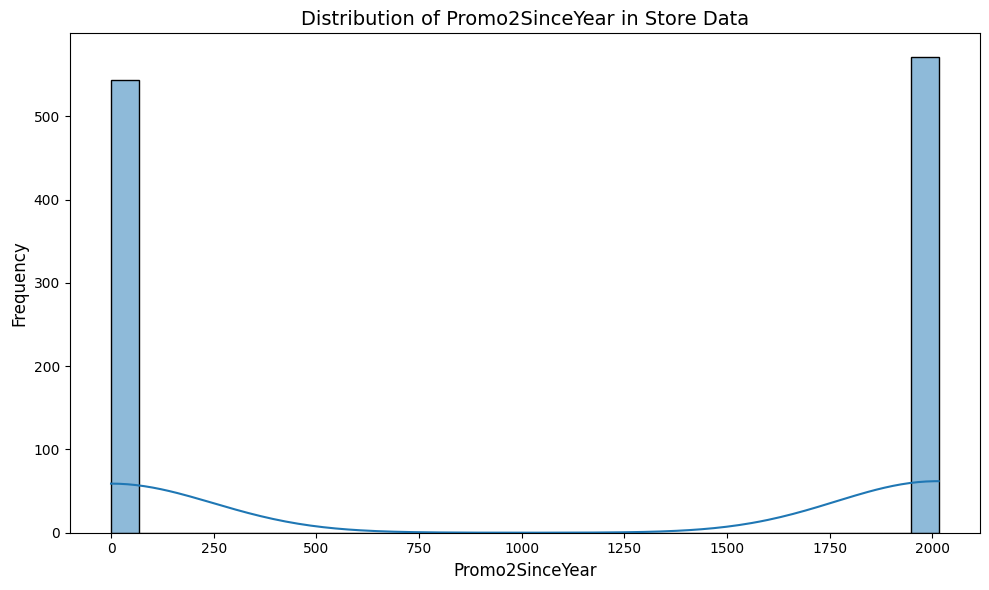

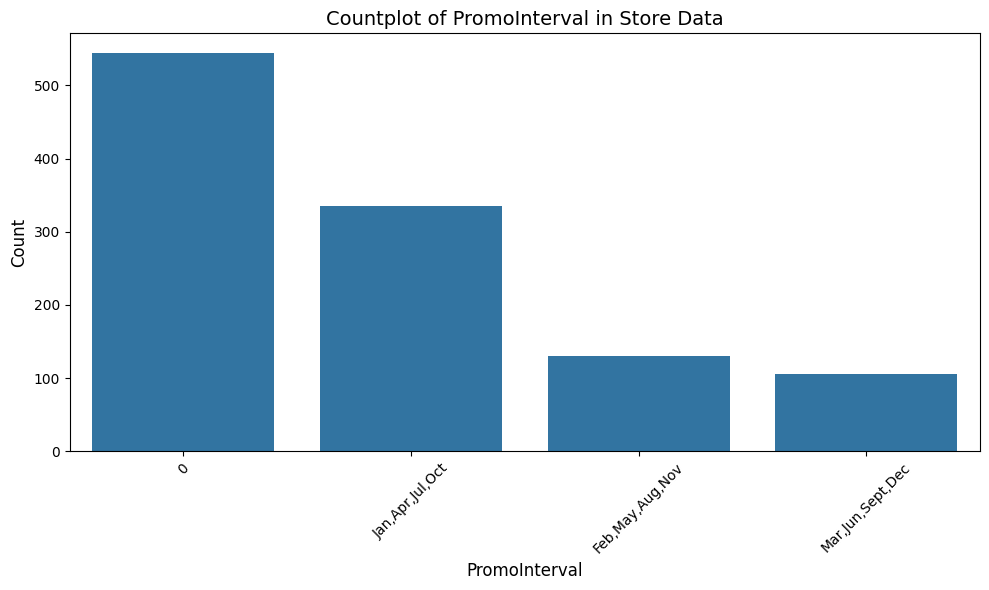

In [ ]:
print("Plotting distributions for 'store_data'")
plot_distributions(store_data, "Store Data")

####Train

Plotting distributions for 'train_data'


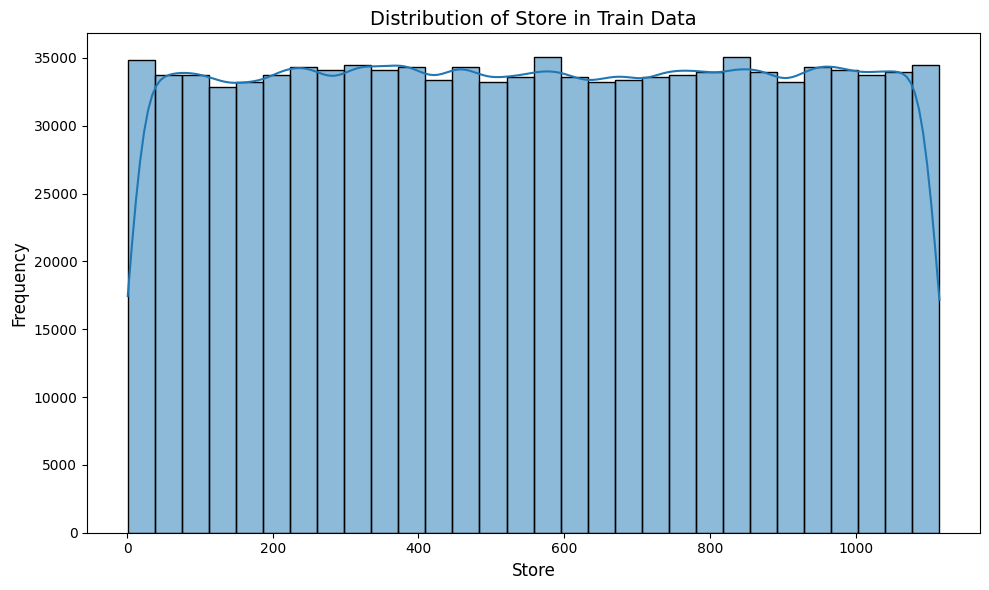

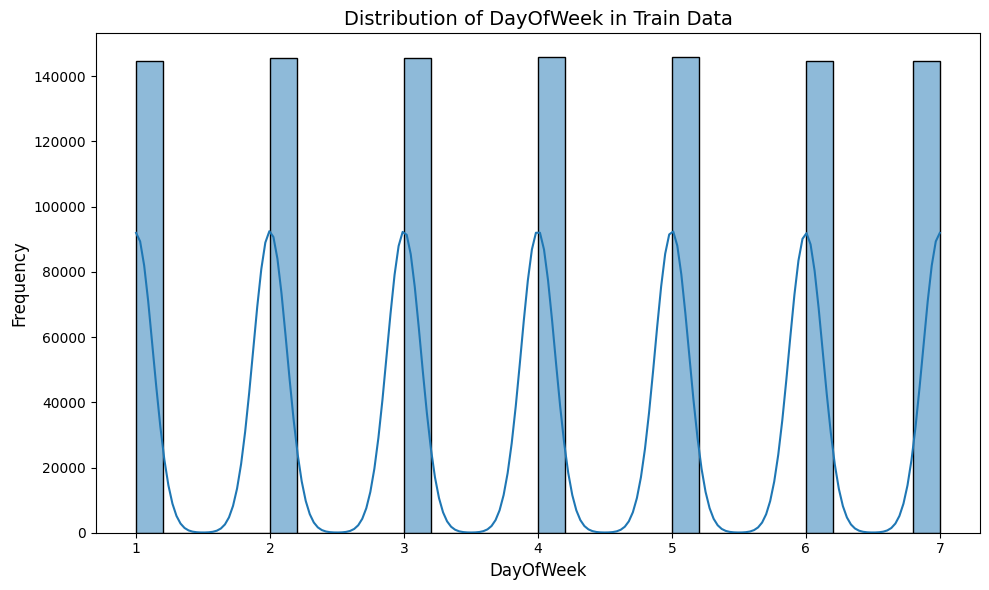

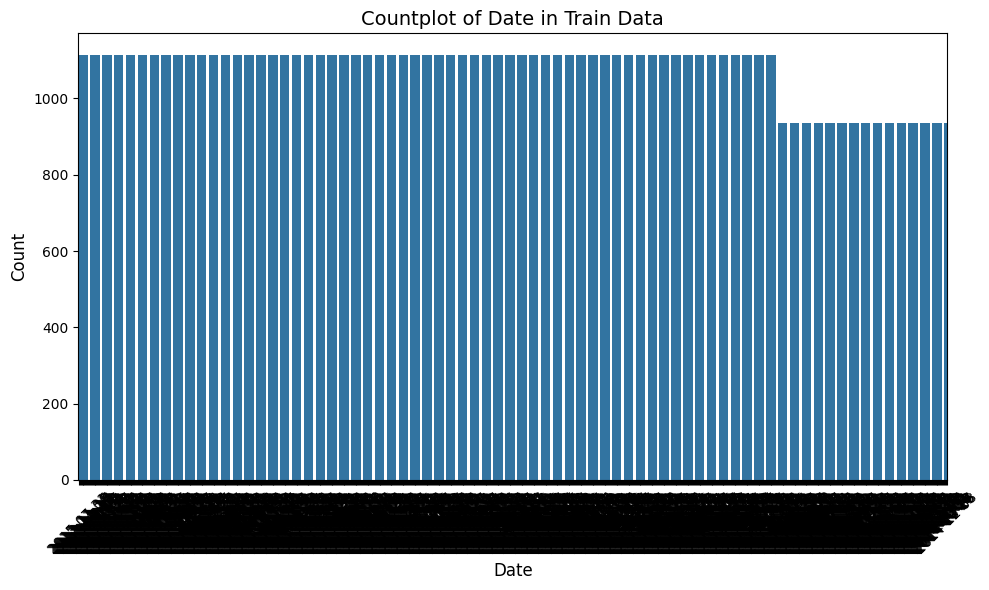

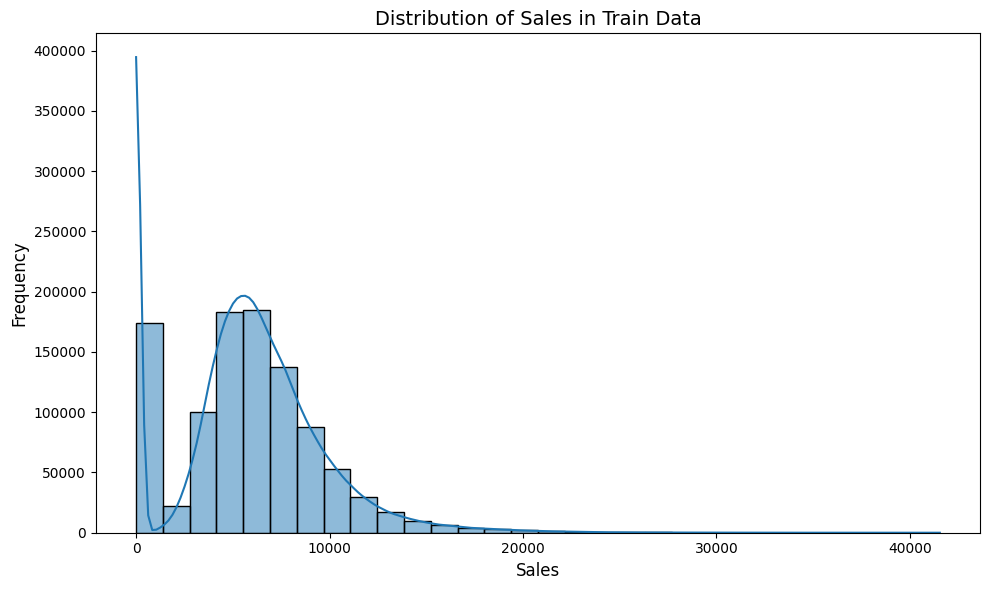

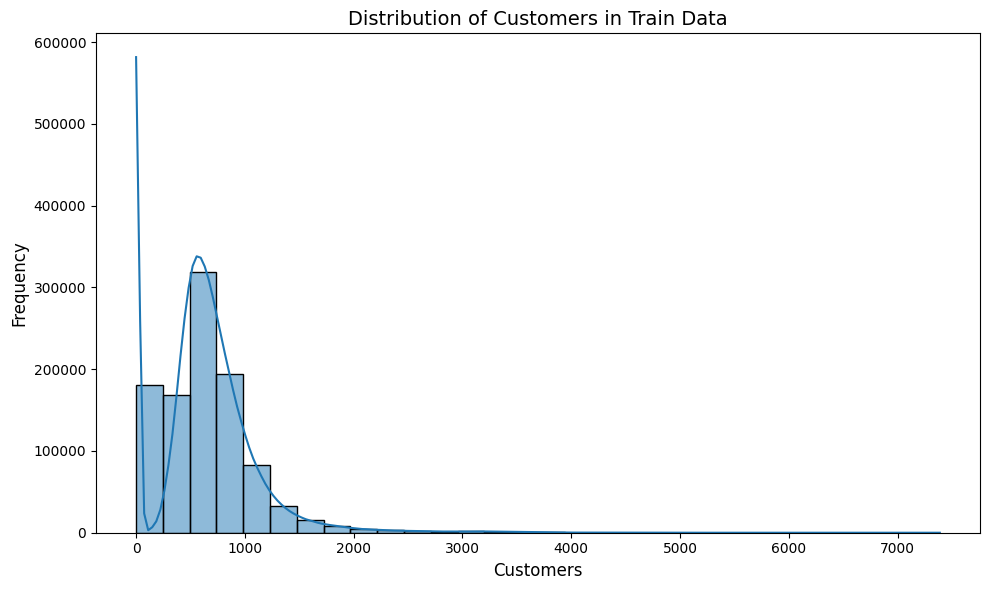

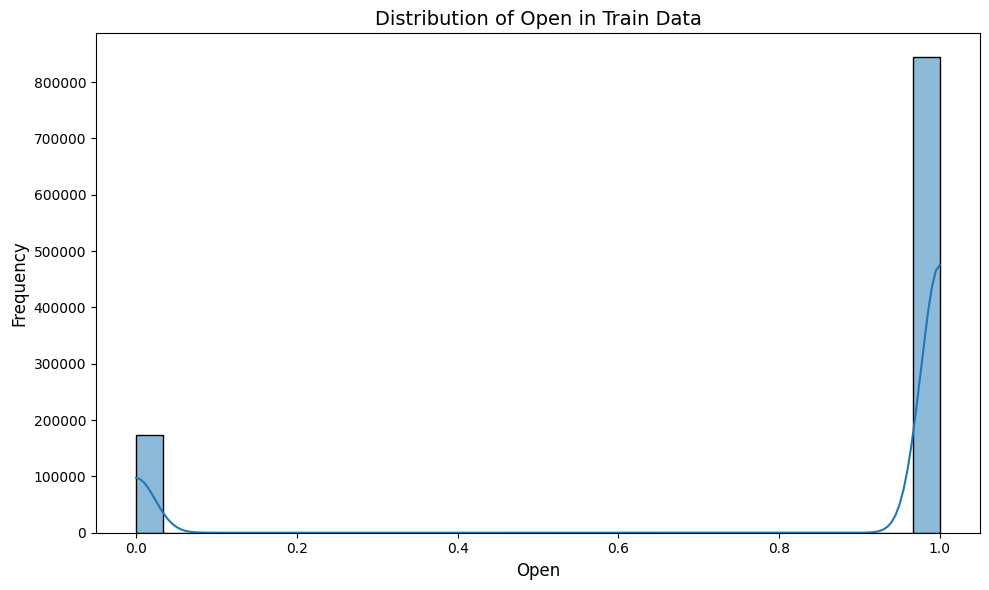

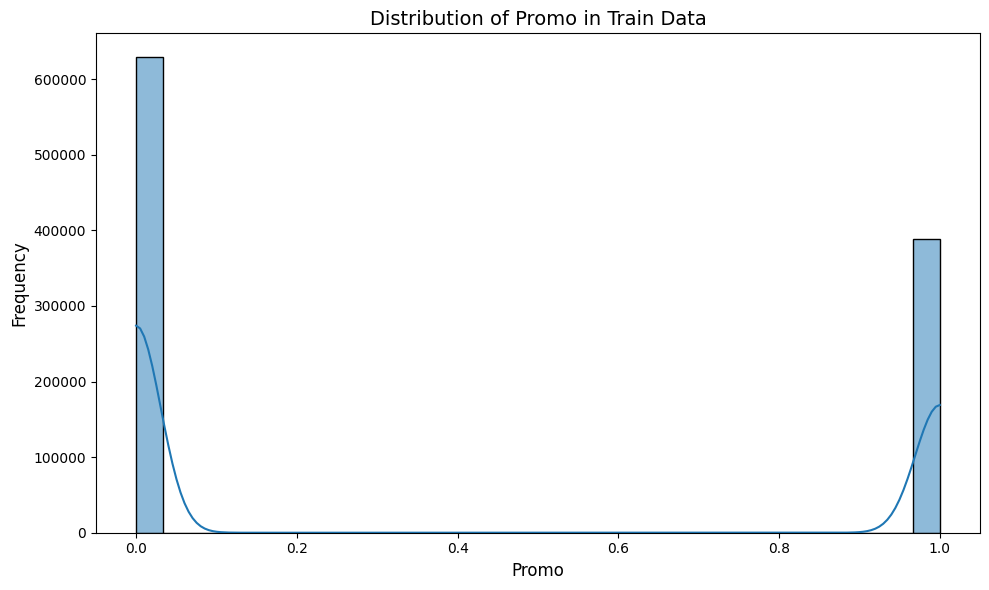

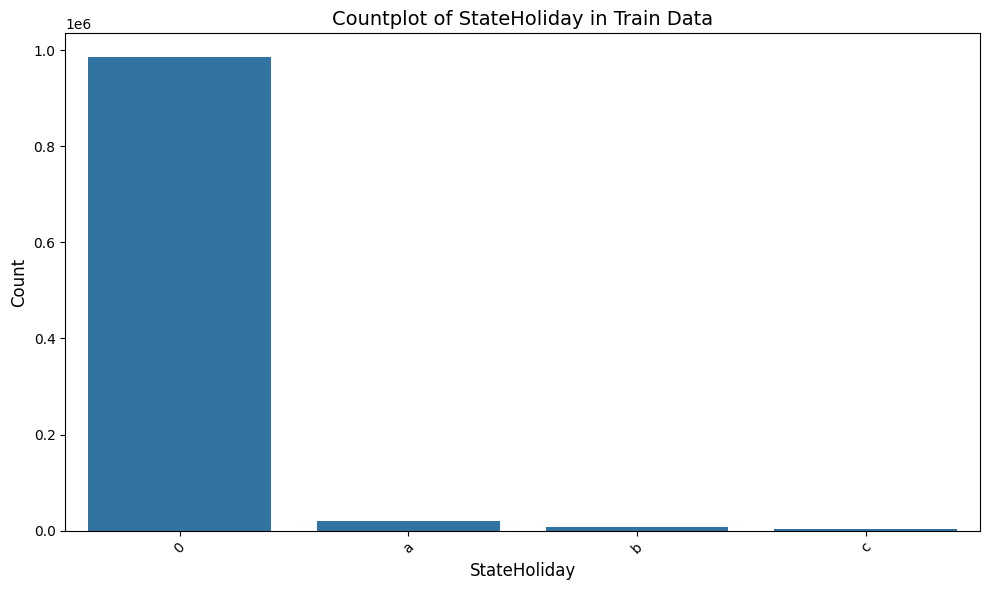

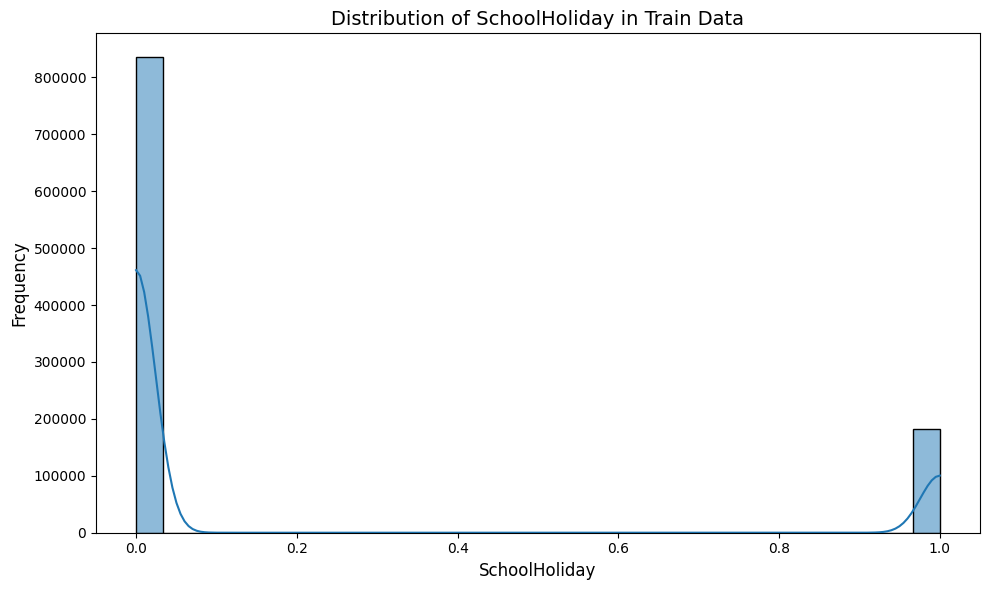

In [ ]:
print("Plotting distributions for 'train_data'")
plot_distributions(train_data, "Train Data")

####Test

Plotting distributions for 'test_data'


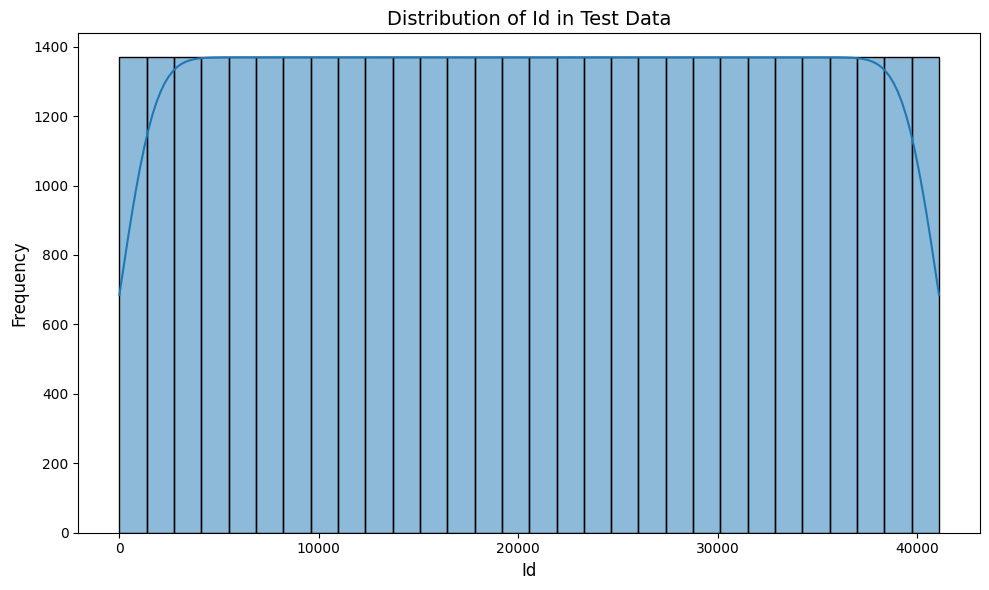

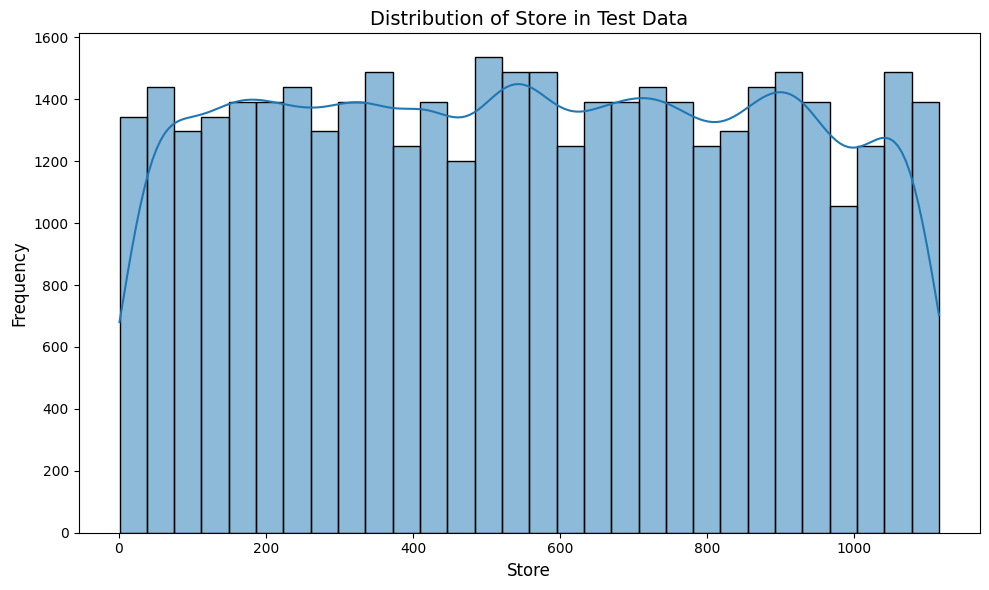

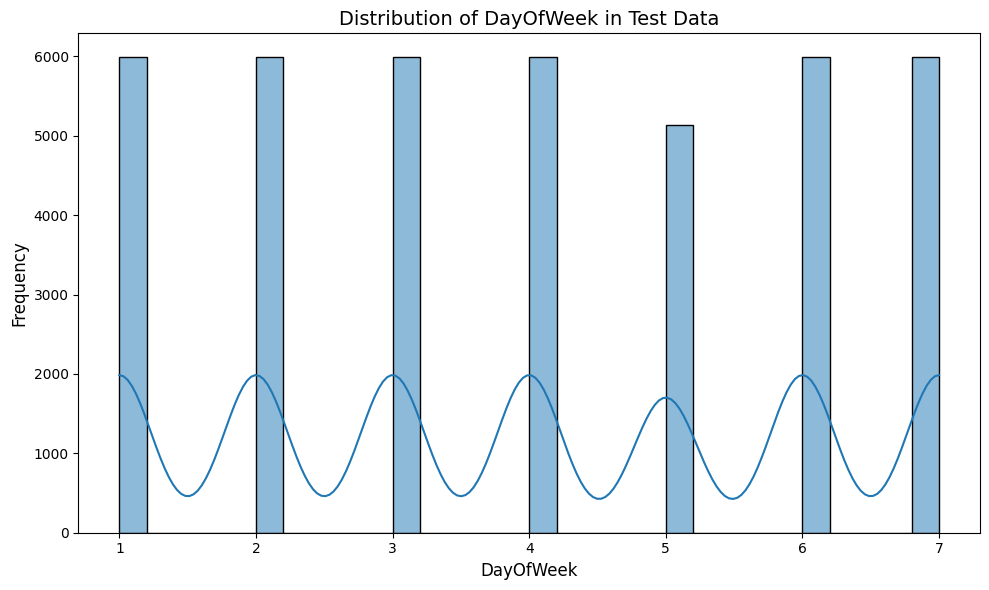

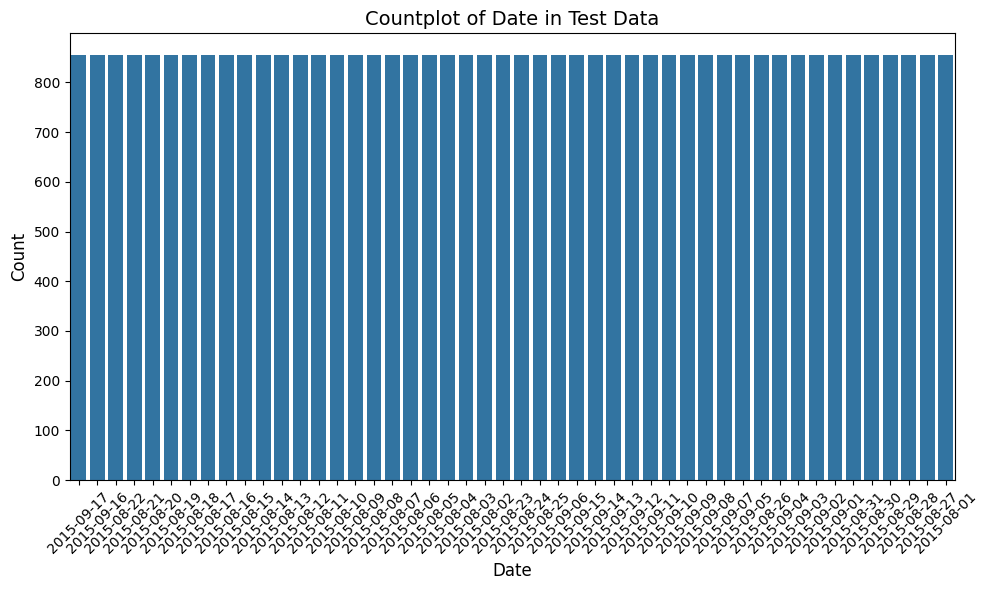

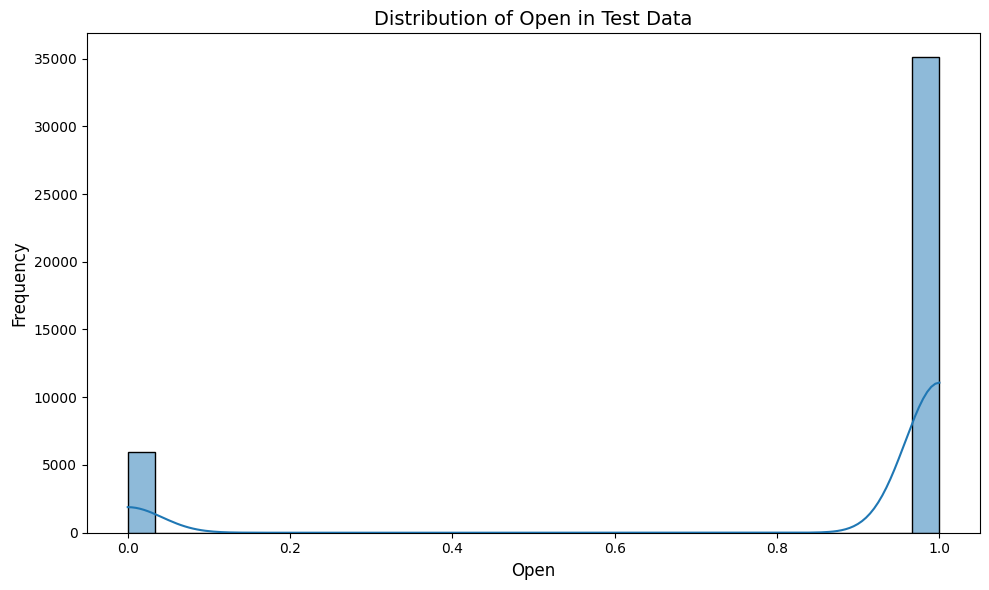

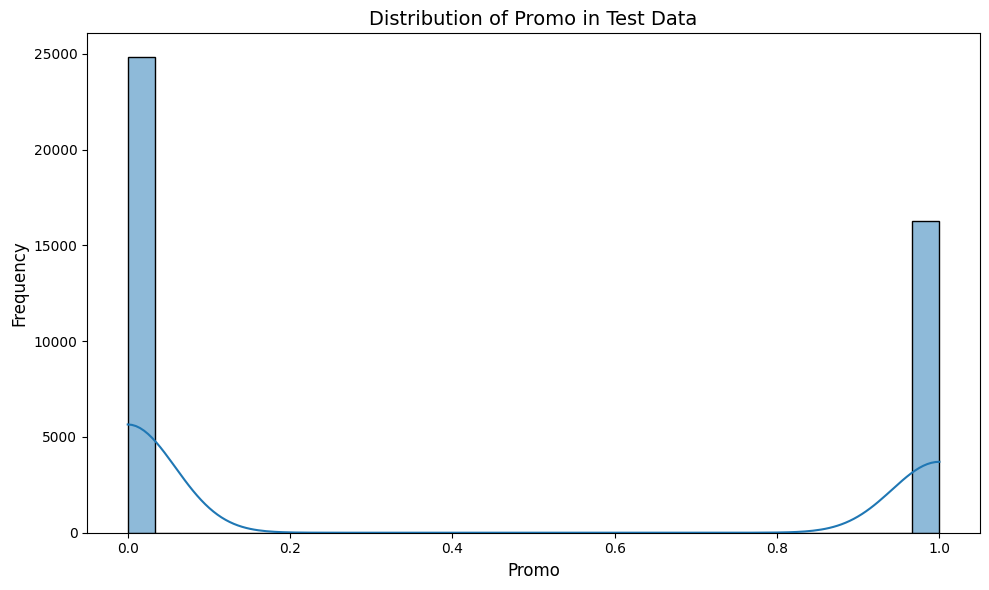

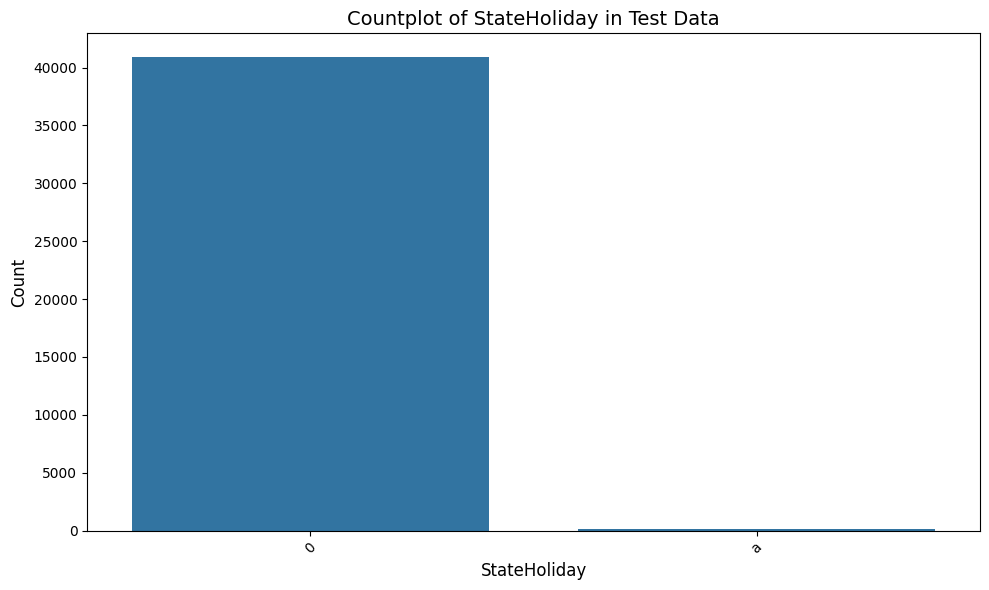

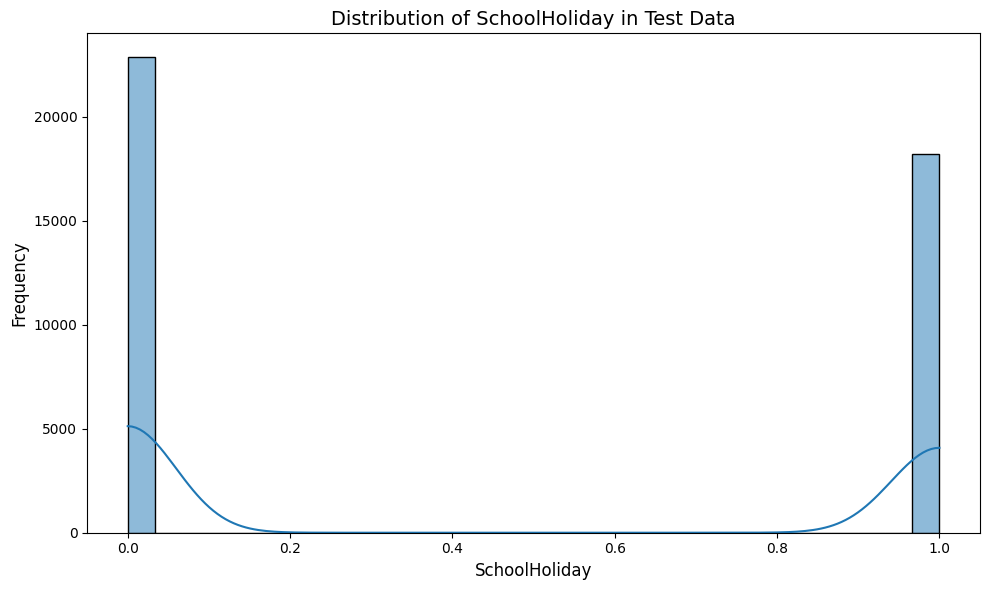

In [ ]:
print("Plotting distributions for 'test_data'")
plot_distributions(test_data, "Test Data")

##Ящик с усами

In [ ]:
# def plot_boxplot(data, dataset_name):
#     numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
#     for column in numeric_columns:
#         plt.figure(figsize=(10, 6))
#         plt.boxplot(data[column].dropna(), vert=False)
#         plt.title(f'Boxplot of {column} in {dataset_name}', fontsize=14)
#         plt.xlabel(column, fontsize=12)
#         plt.tight_layout()
#         plt.show()

def plot_boxplot(data, dataset_name):
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        column_data = data[column].dropna()
        if len(column_data.unique()) > 2:
            plt.figure(figsize=(10, 6))
            box = plt.boxplot(column_data, vert=False, patch_artist=True)
            plt.title(f'Boxplot of {column} in {dataset_name}', fontsize=14)
            plt.xlabel(column, fontsize=12)

            stats = {
                "Min": column_data.min(),
                "Q1": column_data.quantile(0.25),
                "Median": column_data.median(),
                "Q3": column_data.quantile(0.75),
                "Max": column_data.max(),
                "Lower Whisker": box['whiskers'][0].get_xdata()[1],
                "Upper Whisker": box['whiskers'][1].get_xdata()[1]
            }

            plt.annotate(f"Min: {stats['Min']:.2f}", (stats["Lower Whisker"], 1), textcoords="offset points", xytext=(-50, -20), ha='center')
            plt.annotate(f"Max: {stats['Max']:.2f}", (stats["Upper Whisker"], 1), textcoords="offset points", xytext=(50, -20), ha='center')
            plt.annotate(f"Q1: {stats['Q1']:.2f}", (stats["Q1"], 1), textcoords="offset points", xytext=(-50, 10), ha='center')
            plt.annotate(f"Median: {stats['Median']:.2f}", (stats["Median"], 1), textcoords="offset points", xytext=(0, 30), ha='center')
            plt.annotate(f"Q3: {stats['Q3']:.2f}", (stats["Q3"], 1), textcoords="offset points", xytext=(50, 10), ha='center')

            plt.tight_layout()
            plt.show()

###Store


Boxplots for 'store_data'


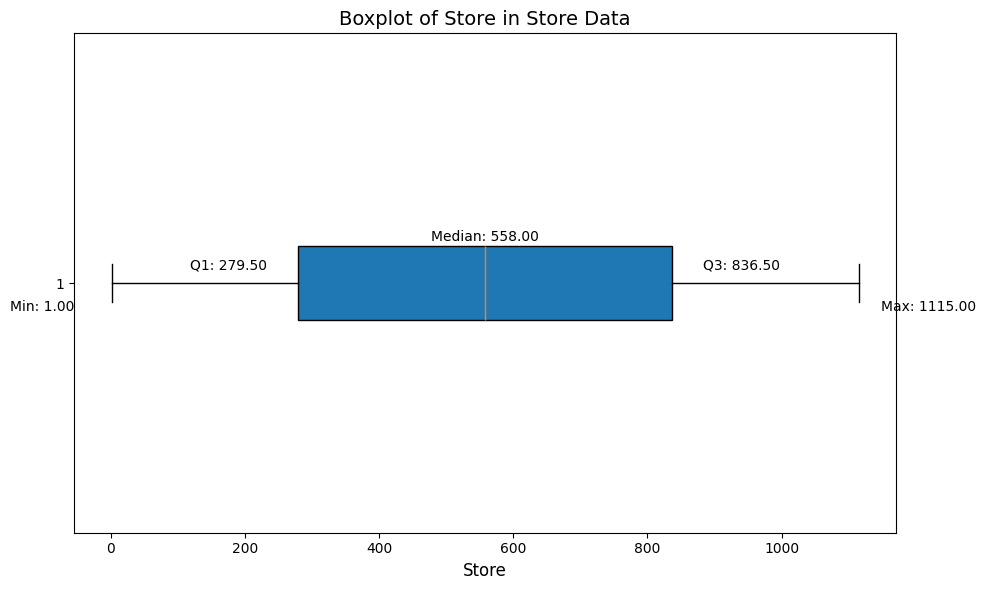

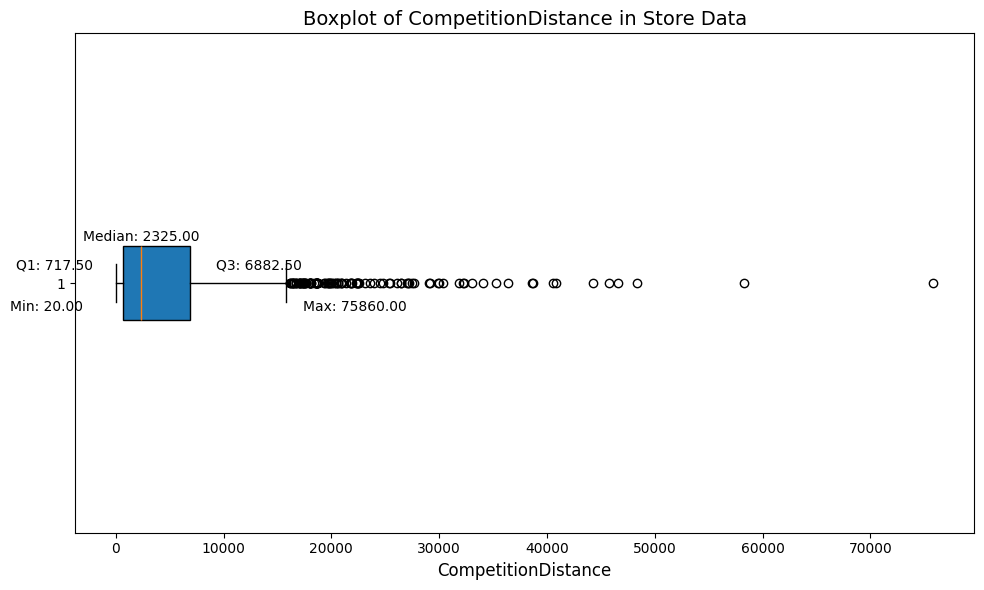

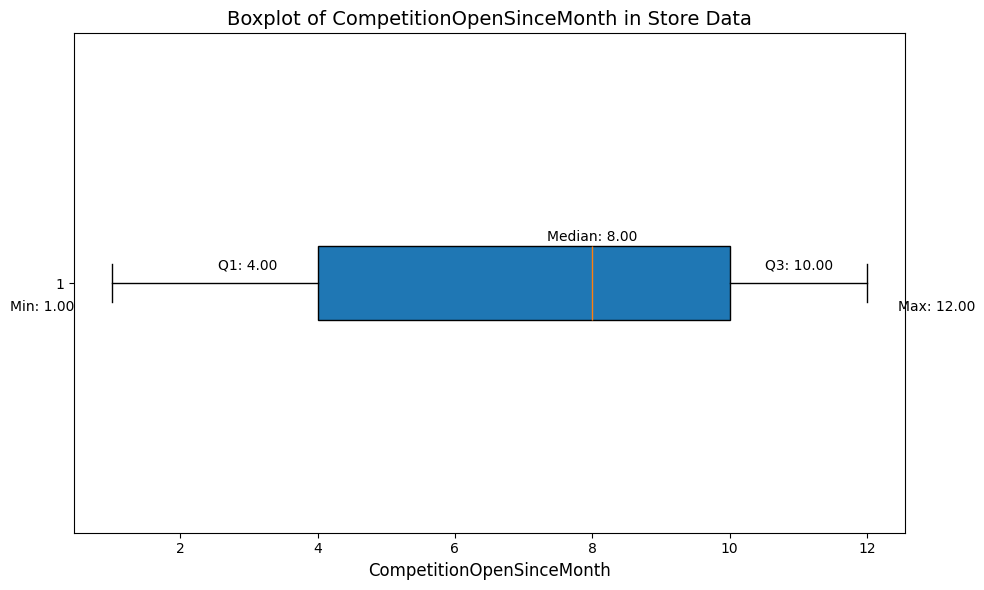

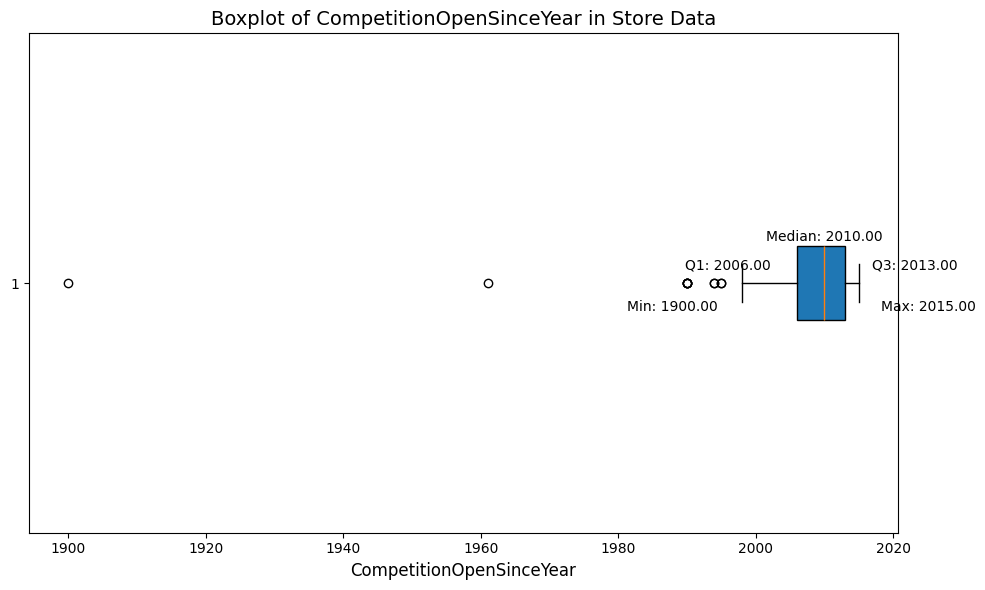

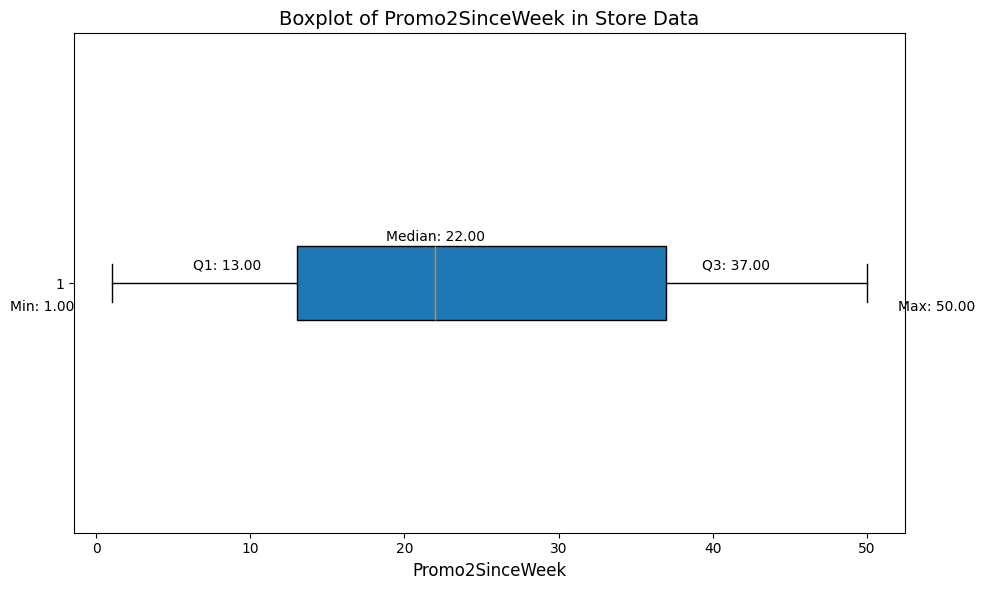

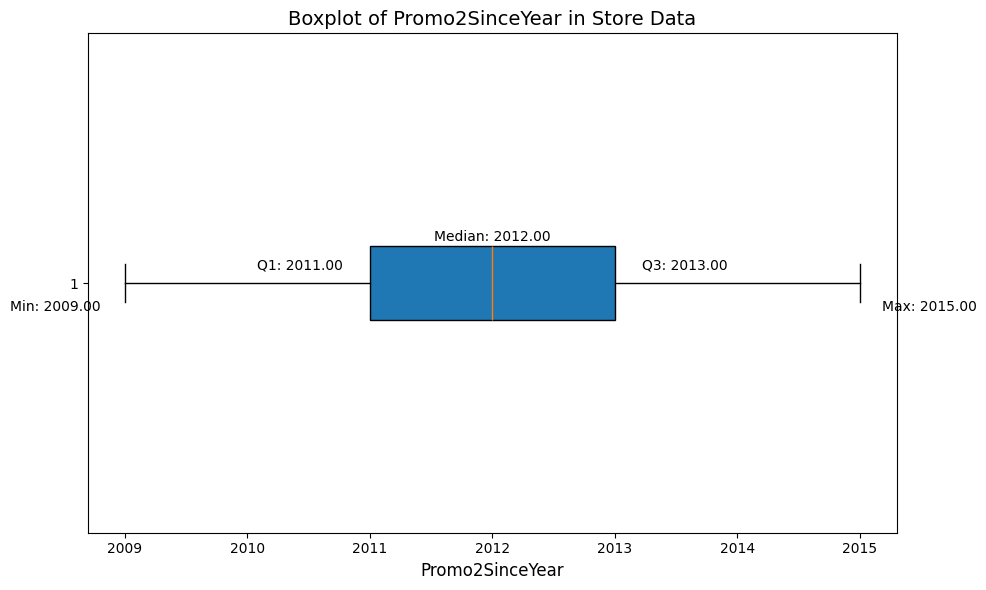

In [ ]:
print("Boxplots for 'store_data'")
plot_boxplot(store_data, "Store Data")

###Train

Boxplots for 'train_data'


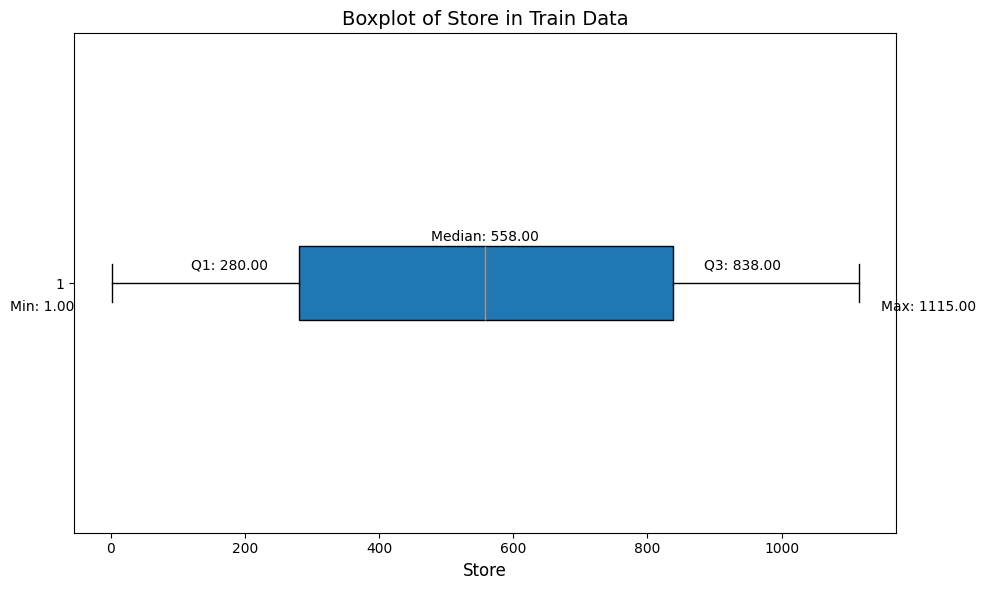

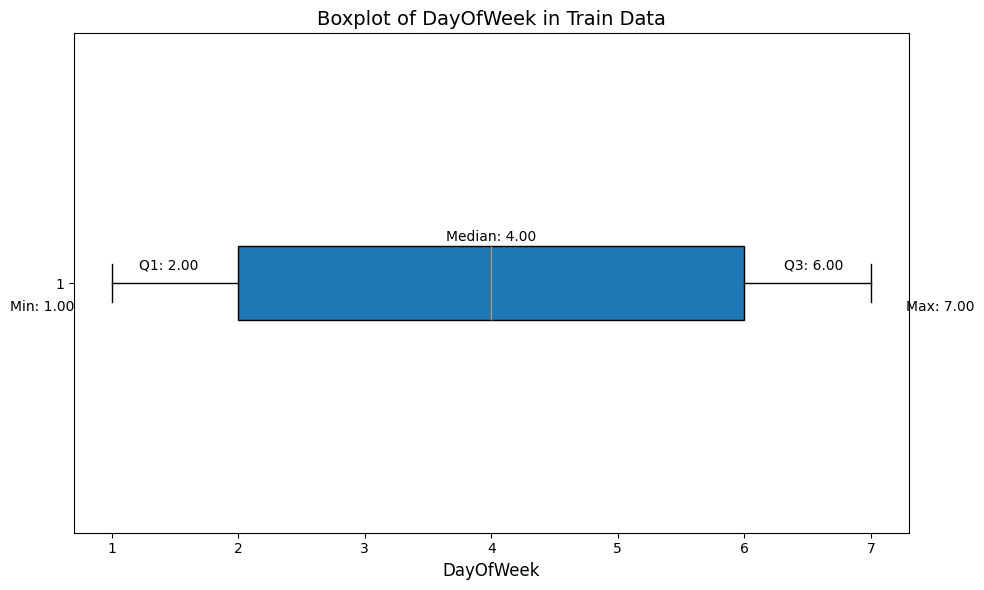

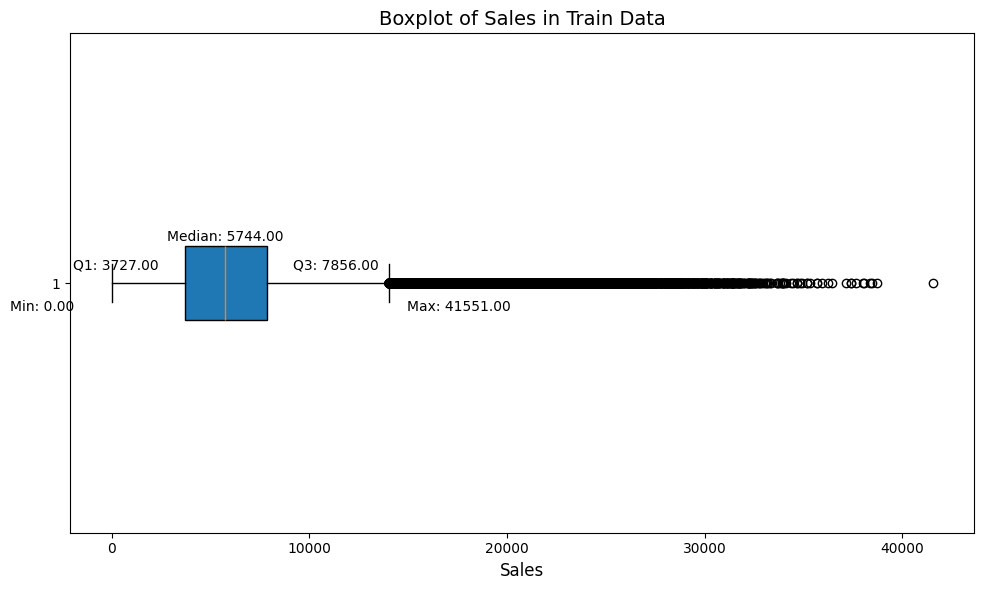

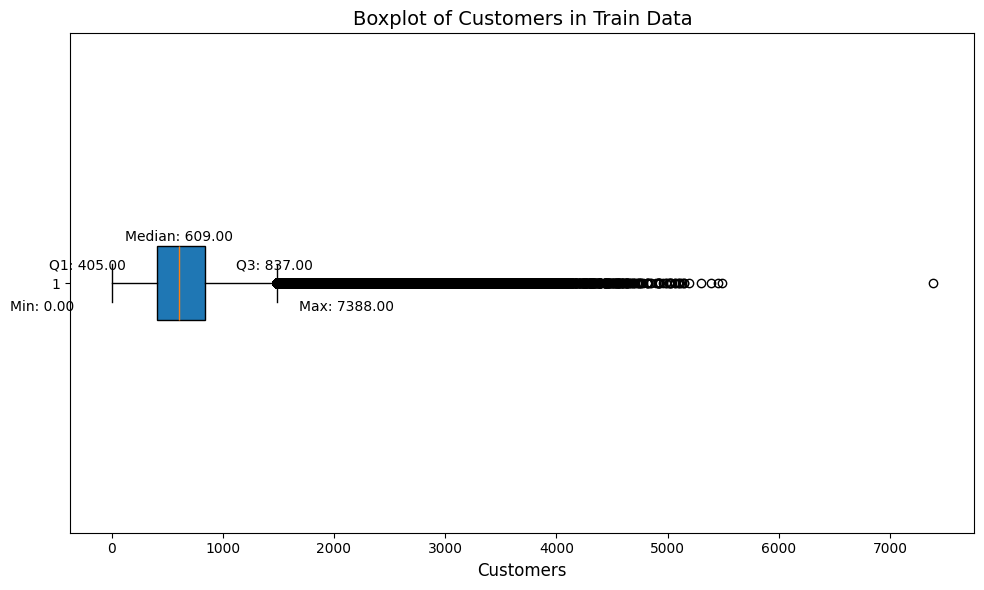

In [ ]:
print("Boxplots for 'train_data'")
plot_boxplot(train_data, "Train Data")

###Test

Boxplots for 'test_data'


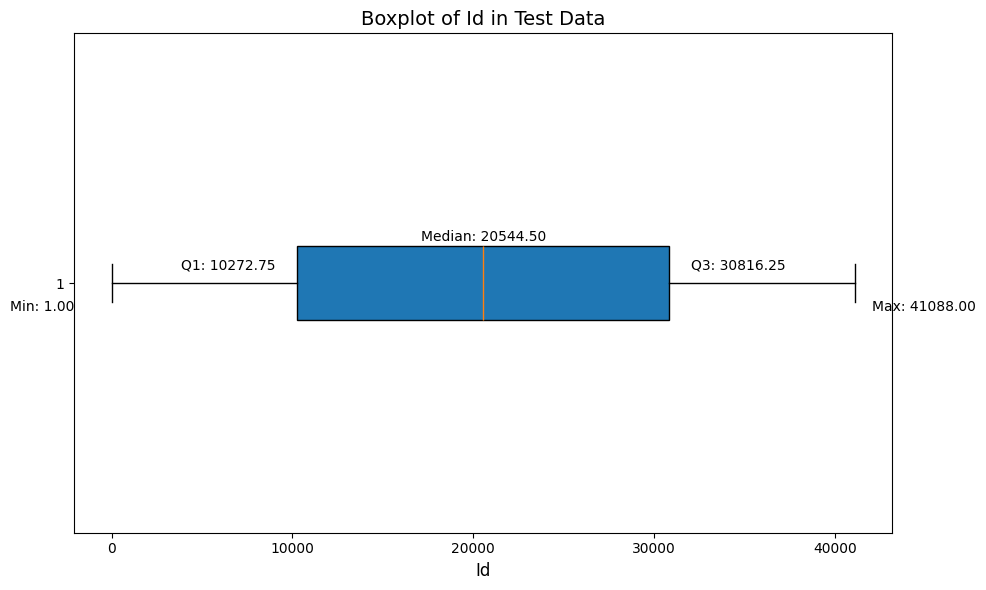

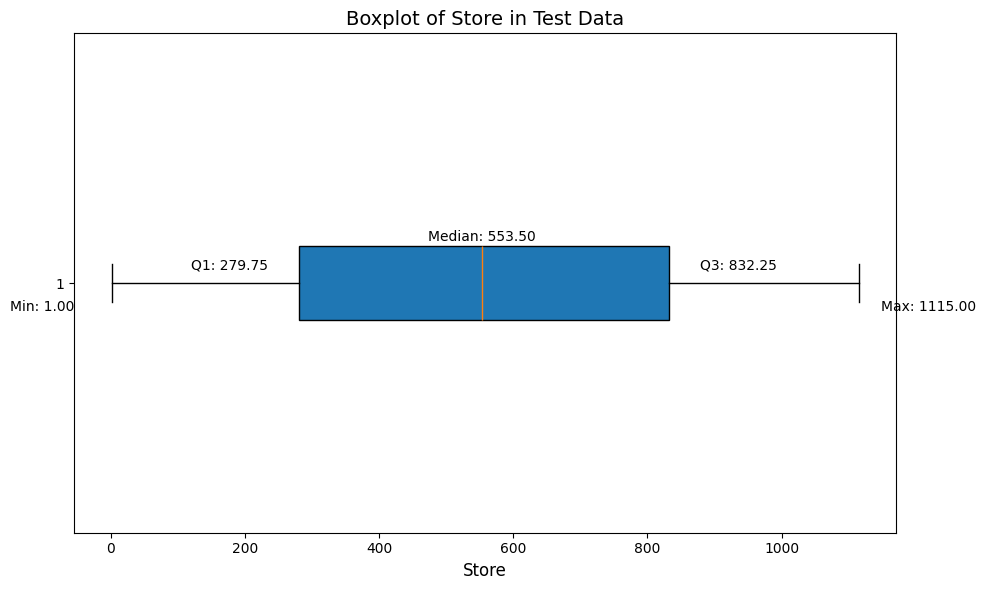

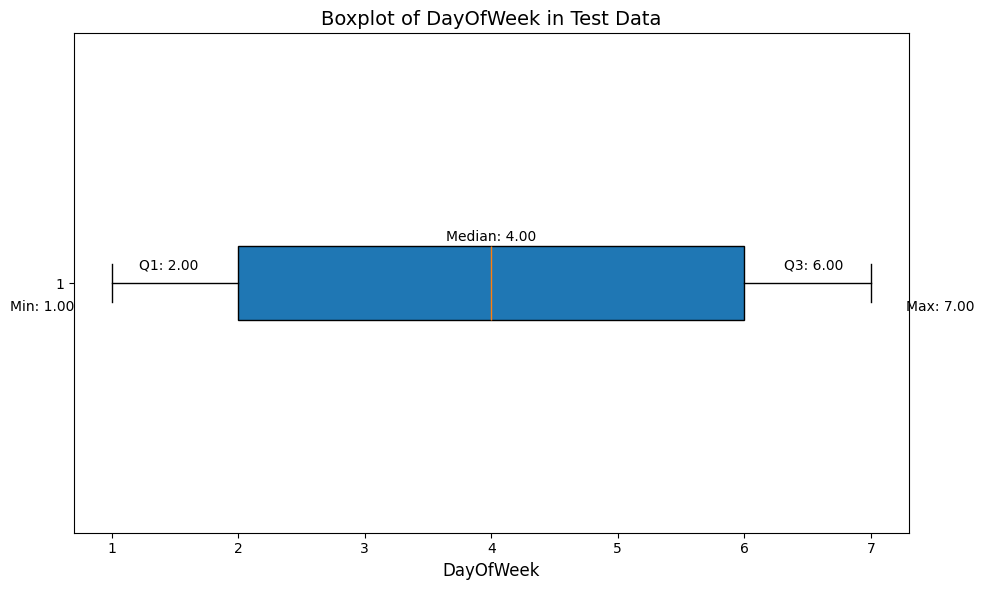

In [ ]:
print("Boxplots for 'test_data'")
plot_boxplot(test_data, "Test Data")

## Очиста данных от пропусков

### Test

In [ ]:
print("Checking missing values in 'test_data'")
check_missing_values(test_data, "Test Data")

Checking missing values in 'test_data'

Missing values in Test Data:
      Missing Count  Missing Percentage
Open             11                0.03


In [ ]:
# Пусть в пропусках магазин будет открыт
test_data.fillna(1, inplace=True)

In [ ]:
print("Checking missing values in 'test_data'")
check_missing_values(test_data, "Test Data")

Checking missing values in 'test_data'

No missing values in Test Data.


### Store

In [ ]:
# Заполним 'CompetitionDistance' медианой
store_data.fillna({'CompetitionDistance': store_data['CompetitionDistance'].median()}, inplace=True)

In [ ]:
# Остальные заполним 0 (0 - отличен от обычных значений в столбцах с пропусками)
store_data.fillna(0, inplace=True)

In [ ]:
print("Checking missing values in 'test_data'")
check_missing_values(store_data, "Test Data")

Checking missing values in 'test_data'

No missing values in Test Data.
